In [14]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
from pull_scribe_data import DB_handler
from kmodes import kmodes
from kmodes import kprototypes


In [5]:
user = "mgooch"
pwd = "SSJ699Goku!"
dbstr = "localhost/scribe"
dbh = DB_handler(user, pwd, dbstr)
df = dbh.grab_usa_medium_tech_data()
print(df.columns)
relevant_df = df.filter(['company', 'industry', 'companyCity', 'companyCountry', 'employeeCount'], axis=1)
for col in relevant_df.columns:
    if col == 'employeeCount':
        relevant_df[col].fillna(value=nan, inplace=True)
    else:
        relevant_df[col].fillna(value="", inplace=True)
print(relevant_df.shape)
print(relevant_df.columns)

Index(['id', 'email', 'firstName', 'lastName', 'company', 'industry', 'title',
       'companyCity', 'companyCountry', 'employeeCount', 'emailError',
       'emailvalidity'],
      dtype='object')
(474137, 5)
Index(['company', 'industry', 'companyCity', 'companyCountry',
       'employeeCount'],
      dtype='object')


In [ ]:
ind_plot = sns.countplot(data=relevant_df,x='industry')

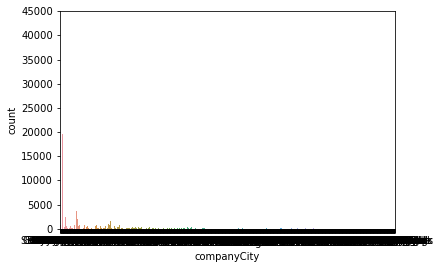

In [60]:
comp_plot = sns.countplot(data=relevant_df,x='companyCity')